# New Section

In [2]:
# from google.colab import drive
#drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

In [3]:
import pandas as pd

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
path = "/Users/madha/Documents/GlobalAIHackathon/final_dataset.csv"
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff,polarity
0,2009-05-04,19.500000,20.520000,19.370001,20.360001,17.537607,3509300,0.000000,0.172727
1,2009-05-08,20.080000,20.450001,19.590000,20.379999,17.554838,6416500,0.339998,0.128807
2,2009-05-12,19.440001,19.500000,18.290001,18.580000,16.004356,5562000,-0.719999,0.000000
3,2009-05-13,18.280001,18.299999,17.600000,17.629999,15.186058,5728600,-0.950001,0.136364
4,2009-05-14,17.650000,18.219999,17.510000,17.950001,15.461695,4256200,0.320002,0.000000


In [6]:
data.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2009-05-04   19.500000   20.520000   19.370001   20.360001   17.537607   
1     2009-05-08   20.080000   20.450001   19.590000   20.379999   17.554838   
2     2009-05-12   19.440001   19.500000   18.290001   18.580000   16.004356   
3     2009-05-13   18.280001   18.299999   17.600000   17.629999   15.186058   
4     2009-05-14   17.650000   18.219999   17.510000   17.950001   15.461695   
...          ...         ...         ...         ...         ...         ...   
2454  2020-06-11  118.489998  118.870003  112.720001  113.250000  113.250000   
2455  2020-06-12  115.459999  115.889999  113.129997  115.150002  115.150002   
2456  2020-06-15  112.540001  118.360001  112.230003  117.370003  117.370003   
2457  2020-06-16  118.690002  120.000000  116.089996  118.529999  118.529999   
2458  2020-06-17  119.070000  119.669998  117.910004  118.129997  118.129997   

       

In [7]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,diff,polarity
Open,1.000000,0.999751,0.999737,0.999519,0.998879,-0.470204,0.016006,-0.102352
High,0.999751,1.000000,0.999590,0.999760,0.999256,-0.465882,0.027141,-0.102269
Low,0.999737,0.999590,1.000000,0.999742,0.998923,-0.474727,0.028125,-0.101889
Close,0.999519,0.999760,0.999742,1.000000,0.999332,-0.470353,0.041501,-0.101716
Adj Close,0.998879,0.999256,0.998923,0.999332,1.000000,-0.461197,0.040666,-0.103374
Volume,-0.470204,-0.465882,-0.474727,-0.470353,-0.461197,1.000000,-0.039818,0.045193
diff,0.016006,0.027141,0.028125,0.041501,0.040666,-0.039818,1.000000,0.013831
polarity,-0.102352,-0.102269,-0.101889,-0.101716,-0.103374,0.045193,0.013831,1.000000


In [8]:
df = data['Close'].reset_index()['Close']

In [11]:
df.shape

(2459,)

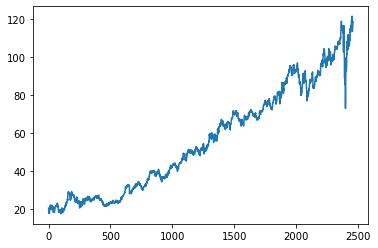

In [12]:
import matplotlib.pyplot as plt
plt.plot(df)

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
df = scalar.fit_transform(np.array(df).reshape(-1,1))

In [14]:
df

array([[0.02942309],
       [0.02961538],
       [0.0123077 ],
       ...,
       [0.96221154],
       [0.97336534],
       [0.96951918]])

In [15]:
df.shape

(2459, 1)

In [16]:
train_size = int(len(df)*0.75)
test_size = len(df) - train_size
train_size

1844

In [17]:
train = df[0:train_size,:]

In [18]:
test = df[train_size : len(df) , : ]

In [19]:
train.shape, test.shape

((1844, 1), (615, 1))

In [20]:
import numpy
def create_dataset(dataset, time_step = 1) :
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1) : 
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0 ])
  return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train,y_train = create_dataset(train,time_step)
X_test,y_test = create_dataset(test,time_step)

In [22]:
X_train

array([[0.02942309, 0.02961538, 0.0123077 , ..., 0.01000001, 0.01500001,
        0.00384617],
       [0.02961538, 0.0123077 , 0.00317308, ..., 0.01500001, 0.00384617,
        0.        ],
       [0.0123077 , 0.00317308, 0.00625001, ..., 0.00384617, 0.        ,
        0.00057694],
       ...,
       [0.55163458, 0.55567303, 0.55586538, ..., 0.55865385, 0.56528841,
        0.56567304],
       [0.55567303, 0.55586538, 0.55490385, ..., 0.56528841, 0.56567304,
        0.56769226],
       [0.55586538, 0.55490385, 0.55721153, ..., 0.56567304, 0.56769226,
        0.57086535]])

In [23]:
X_train.shape,y_train.shape

((1743, 100), (1743,))

In [24]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
X_train.shape

(1743, 100, 1)

In [4]:

from keras.layers.core import Dense
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
import matplotlib.pyplot as plt
import time
%matplotlib inline

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [27]:
model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

NameError: name 'Sequential' is not defined

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))